# Morfolojik Operatörler

 Matematiksel morfoloji, geometrik objelerde ilgili işlem ve analiz yapma teori ve tekniğidir. Temel küme teoremi, topoloji, rasgele fonksiyonlar kafes kuramına bağlıdır.En yaygın kullanımı sayısal görüntüler üzerindedir. Ancak bilindiği üzeere grafikler, yüzey ağları, katı cisimler v epek çok uzaysal cisimlerde kullanılmaktadır.

In [13]:
import matplotlib.pyplot as plt
from Operators import *

## Operatörler

### Aşınma (Erosion)

Bir ikili görüntü  $(A)$  ve bir yapısal eleman $(B)$ verildiğinde:

$$
A \ominus B = \{ z \in E  |  B_z \subseteq A \}
$$

Burada;
- $A$: İkili görüntüdür (Binary Image).
- $B$: Yapısal elemandır (Structuring Element).
- $z$: Öklidyen uzaydaki $(E)$ noktalarından biridir.
- $B_z$: $B$ yapısal elemanının $z$ noktasındaki ötelemesidir.


- $A$ kümesinin $B$ yapısal elemanının $z$ noktasına göre kaydırılmış hali ile aşınma (erosion) işlemi sonucunda, eğer yapısal elemanın tamamı küme içerisinde ise sonuç 1 olur. Aksi takdirde 0 olur.
- ikili imgedeki nesneyi küçültmeye ya da inceltmeye yarayan morfolojik işlemdir.
- İmge içerisindeki nesneler ufalır, delik varsa genişler, bağlı nesneler ayrılma eğilimi gösterir.
- Operatörün temel etkisi görüntüyü kenarlarından erozyona uğratmaktadır. Sonuçta pilsel grupları ve aralarındaki boşluklar küçülür seçilen SE’ye göre gürültülü şekiller düzelir.

## Yapılandırma Elemanları (Structuring Element - SE)

- Yapılandırma elemanları(Structuring Element), farklı şekillerde ve büyüklüklerde olabilmektedir. Bunların bir merkez noktası bulunmakta olup, işlenecek resmin her bir pikseli bu noktaya oturtularak işlem yapılmaktadır.


In [14]:
path = 'image.png'  # Görüntü yolu
binary_image = load_binary_image(path)

In [15]:
# Yapılandırma Elemanı (Structuring Element)
kernel = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])

In [16]:
eroded = erosion(binary_image, kernel)

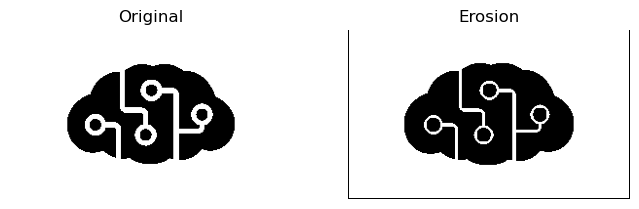

In [17]:
plt.figure(figsize=(8, 6))
titles = ['Original', 'Erosion']
images = [binary_image, eroded]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### Genişleme (Dilation)

Bir ikili görüntü $(A)$ ve bir yapısal eleman $(B)$ verildiğinde:

$$
A \oplus B = \{ z \in E \ | \ B_z \cap A \neq \emptyset \}
$$

Burada;
- $A$: İkili görüntüdür (Binary Image).
- $B$: Yapısal elemandır (Structuring Element).
- $z$: Öklidyen uzaydaki $(E)$ noktalarından biridir.
- $B_z$: $B$ yapısal elemanının $z$ noktasındaki ötelemesidir (Translation).
- $\cap$: Kesişim işlemi (Intersection).
- $\neq \emptyset$: Kesişim boş küme değilse (yani en az bir piksel çakışıyorsa) genişleme işlemi uygulanır.



- $z$ noktaına göre kaydırılmış $B$ yapısal elemanı ile $A$ kümesinin kesişen ortak bir elemanı varsa merkez noktanın değeri 1 olur. Aksi takdirde 0 olur.
- ikili imgedeki nesneyi büyütmeye ya da kalınlaştırmaya yarayan morfolojik işlemdir.
- Sayısal bir imgeyi genişletmek imgeyi yapısal elemanla kesiştiği bölümler kadar büyütmektir.
- Yayma işlemi uygulanmış bir imgede, imge içerisindeki deliklerin ve boşlukların doldurulması ve köşe noktasının yumuşaması gözlenir.
- Operatörün temel etkisi görüntüyü kenarlarından genişletmektir. Sonuçta pilsel grupları büyür ve aralarındaki boşluklar küçülür.

In [18]:
dilated = dilation(binary_image, kernel)

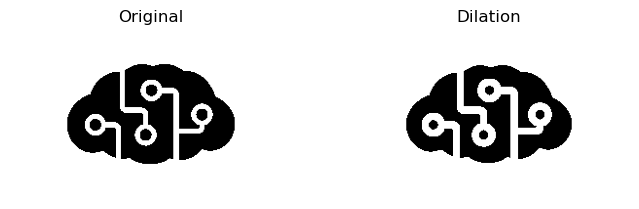

In [19]:
plt.figure(figsize=(8, 6))
titles = ['Original', 'Dilation']
images = [binary_image, dilated]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### Açma (Opening)

Bir ikili görüntü $(A)$ ve bir yapısal eleman $(B)$ verildiğinde:

$$
A \circ B = \{ z \in E \ | \ B_z \cap A \neq \emptyset \} = (A \ominus B) \oplus B
$$

Burada;
- $A$: İkili görüntüdür (Binary Image).
- $B$: Yapısal elemandır (Structuring Element).
- $z$: Öklidyen uzaydaki $(E)$ noktalarından biridir.
- $B_z$: $B$ yapısal elemanının $z$ noktasındaki ötelemesidir.
- $\cap$: Kesişim işlemi.
- $\neq \emptyset$: Kesişim boş küme değilse (yani en az bir piksel çakışıyorsa) erozyon işlemi uygulanır.

- Açma işlemi, önce aşınma $A \ominus B$ sonra genişleme $\oplus B$ işlemlerini uygulayarak şekillerin dış hatlarını incelemeye olanak tanır ve küçük gürültüleri temizler.
- Şekiller yumuşatılır, şekilleri birbirine bağlayan küçük parçalar silinir, küçük adacıklar/tepecikler silinir.



In [20]:
opened = opening(binary_image, kernel)

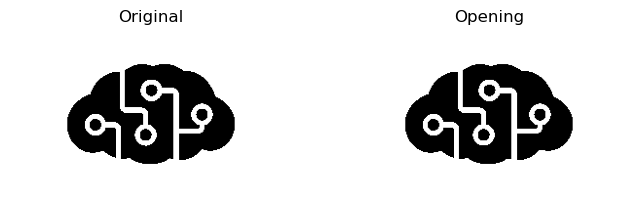

In [21]:
plt.figure(figsize=(8, 6))
titles = ['Original', 'Opening']
images = [binary_image, opened]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### Kapama (Closing)

Bir ikili görüntü $(A)$ ve bir yapısal eleman $(B)$ verildiğinde:

$$
A \bullet B = \{ z \in E \ | \ B_z \cap A \neq \emptyset \} = (A \oplus B) \ominus B
$$

Burada;
- $A$: İkili görüntüdür (Binary Image).
- $B$: Yapısal elemandır (Structuring Element).
- $z$: Öklidyen uzaydaki $(E)$ noktalarından biridir.
- $B_z$: $B$ yapısal elemanının $z$ noktasındaki ötelemesidir.
- $\cap$: Kesişim işlemi.
- $\neq \emptyset$: Kesişim boş küme değilse (yani en az bir piksel çakışıyorsa) genişleme işlemi uygulanır.

- Kapama işlemi, önce genişleme $ A \oplus B $ sonra erozyon $ \ominus B $ işlemlerini uygulayarak şekillerin içindeki küçük boşlukları doldurur ve yakın nesneleri birbirine bağlar.
- Şekiller yumuşatılır, dar kırılma noktaları ve uzun ince boşluklar kaynaştırılır, küçük boşluklar kaldırılır.


In [22]:
closed = closing(binary_image, kernel)

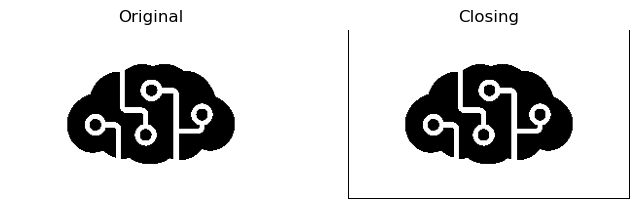

In [23]:
plt.figure(figsize=(8, 6))
titles = ['Original', 'Closing']
images = [binary_image, closed]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()